In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

from data import CHBMIT

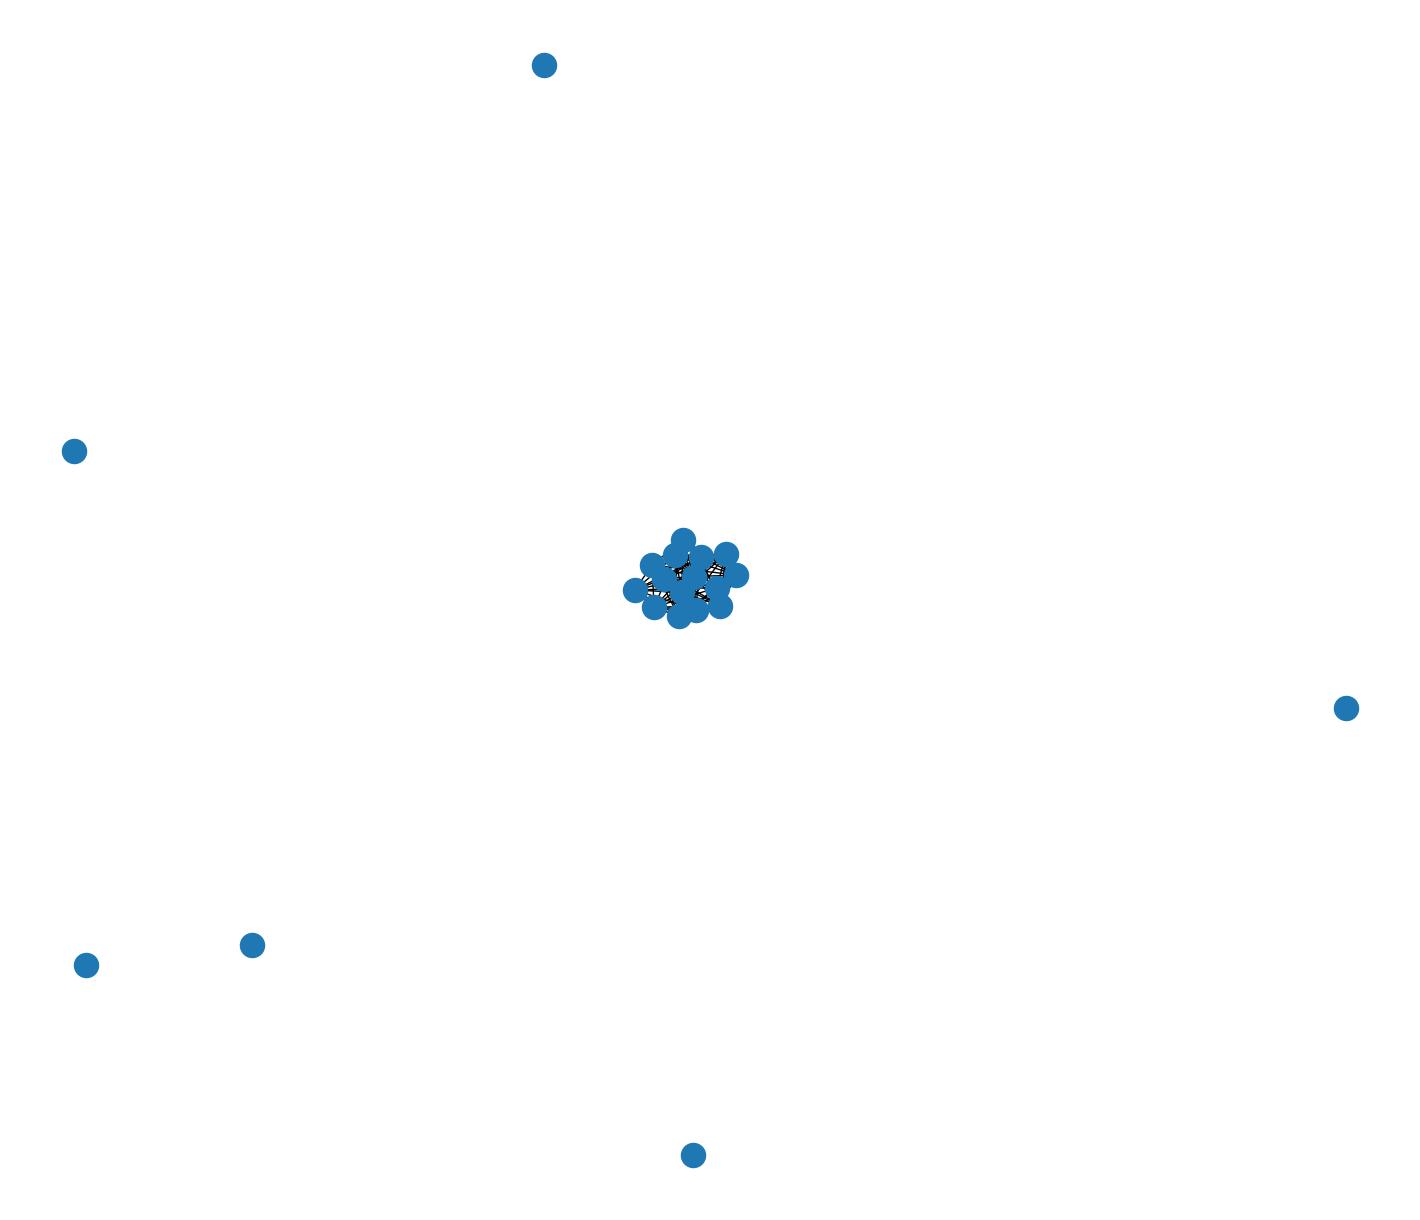

In [2]:
dm = CHBMIT(fold=0, folds=1, batch_size=8, batch_type="graph2vec", edge_select="far", wave_transform="power")
dm.setup("fit")

g = to_networkx(dm.trainset[5], to_undirected=True)
plt.figure(1, figsize=(14, 12))
nx.draw(g)
plt.show()

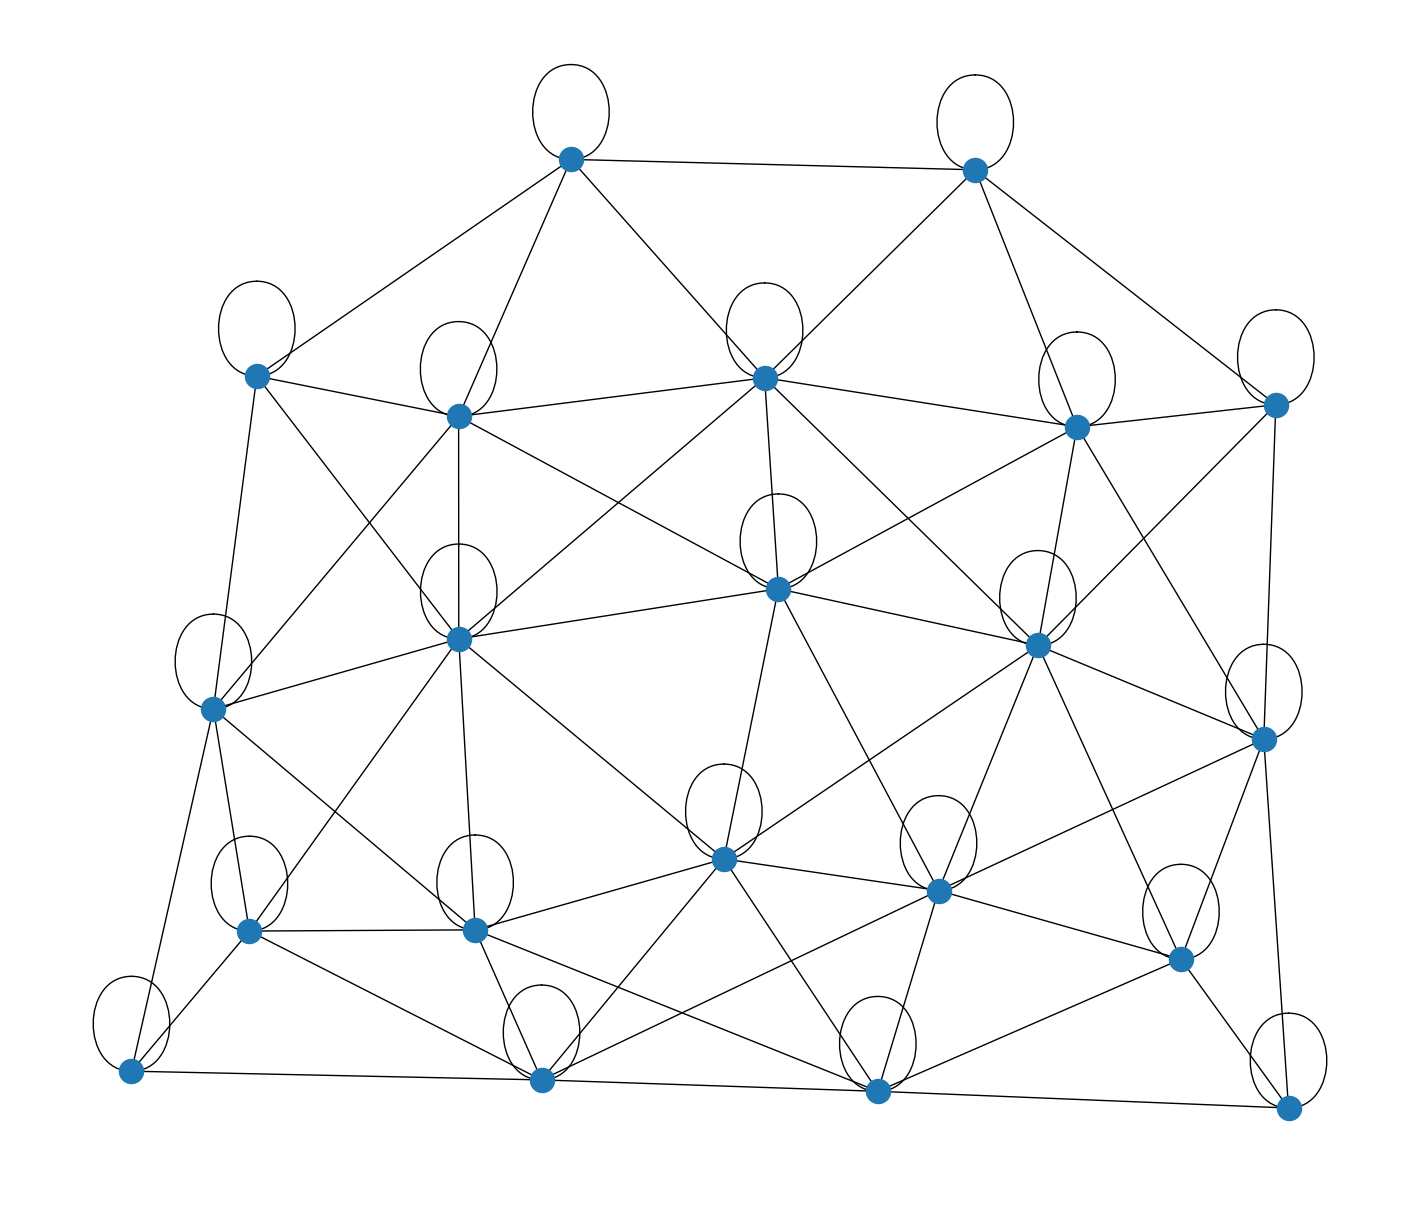

In [13]:
dm = CHBMIT(batch_size=8, batch_type="graph2vec", edge_select="close", wave_transform="power")
dm.setup("fit")

g = to_networkx(dm.trainset[5], to_undirected=True)
plt.figure(1, figsize=(14, 12))
nx.draw(g)
plt.show()

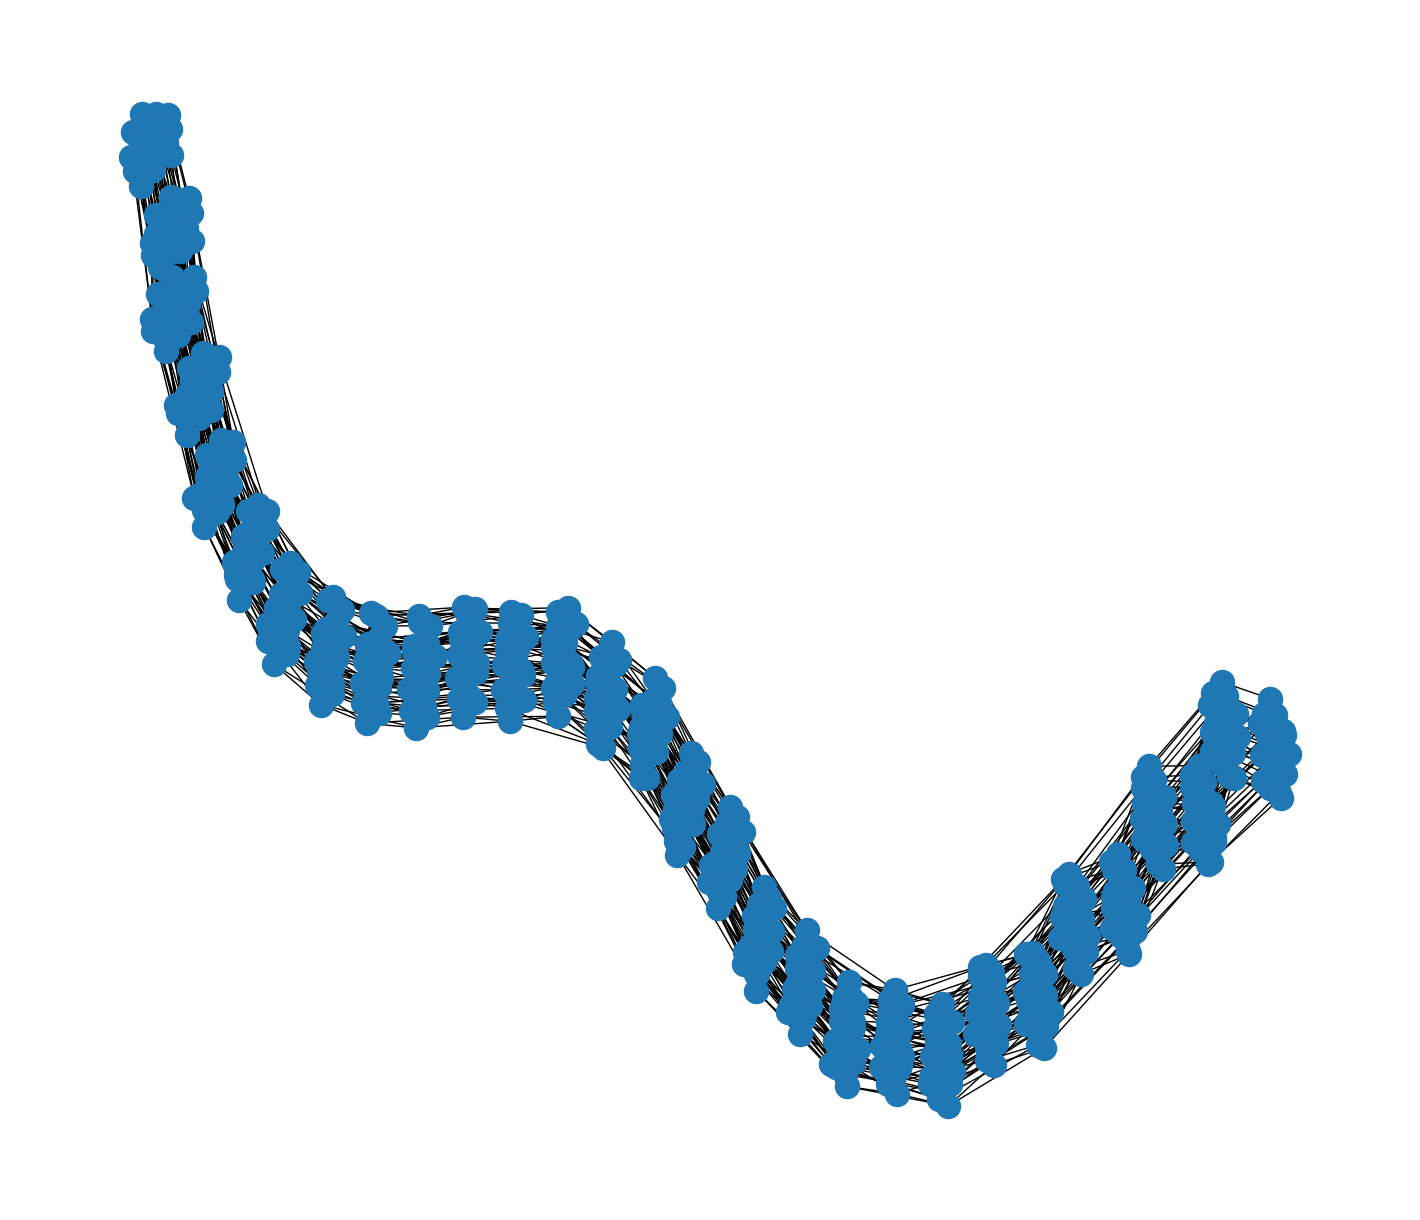

In [14]:
dm = CHBMIT(batch_size=8, batch_type="graph2seq", edge_select="far", wave_transform="power")
dm.setup("fit")

g = to_networkx(dm.trainset[5], to_undirected=True)
plt.figure(1, figsize=(14, 12))
nx.draw(g)
plt.show()

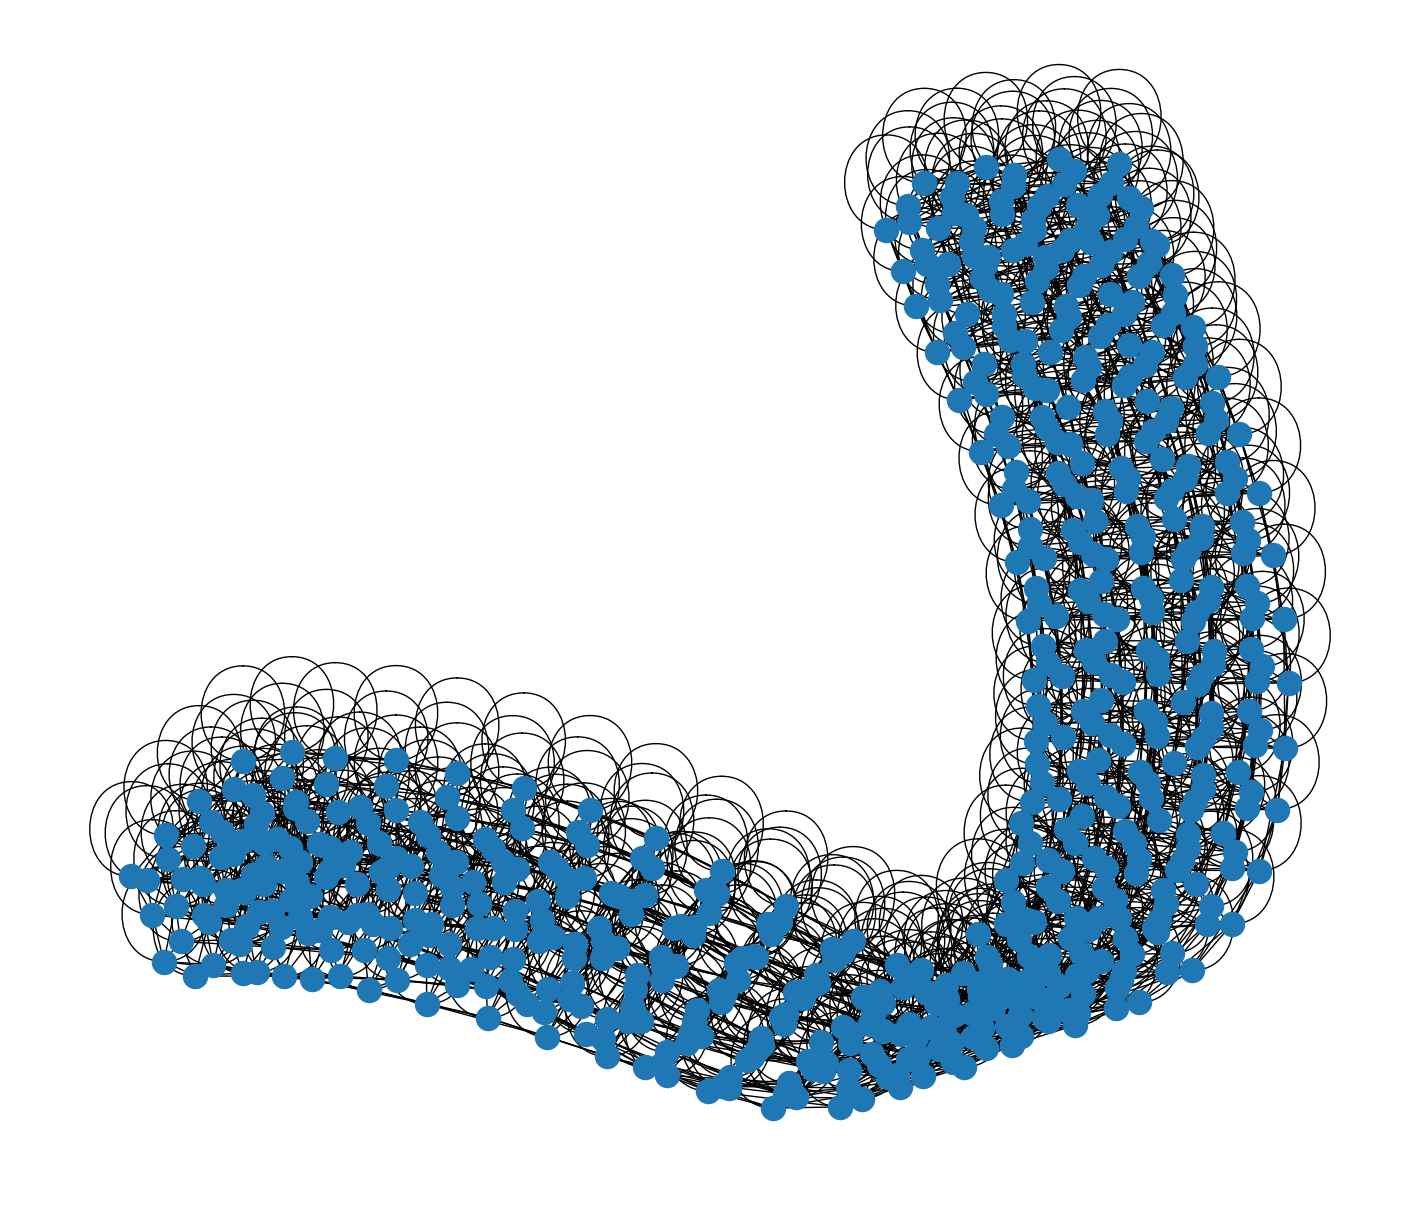

In [15]:
dm = CHBMIT(batch_size=8, batch_type="graph2seq", edge_select="close", wave_transform="power")
dm.setup("fit")

g = to_networkx(dm.trainset[5], to_undirected=True)
plt.figure(1, figsize=(14, 12))
nx.draw(g)
plt.show()

In [1]:
import mne
import wfdb
import glob
import numpy as np

In [16]:
def get_labels(raw, annotations):
    seconds = int(raw.n_times / 100)
    labels = np.zeros(seconds, dtype=np.int64)
    
    if f"{raw.filenames[0]}.seizures" in annotations:
        seizure = wfdb.io.rdann(raw.filenames[0], extension="seizures")
        start = int(seizure.sample[0] / raw.info["sfreq"])
        finish = int(seizure.sample[1] / raw.info["sfreq"])
        labels[start:finish] = 1

        return finish - start
    
    return 0

In [18]:
path = "/root/pytorch_datasets/chb_mit_raw/chb-mit"
patient_paths = glob.glob(f"{path}/*")

for patient_path in patient_paths:
    records = sorted(glob.glob(f"{patient_path}/*.edf", recursive=True))
    annotations = glob.glob(f"{patient_path}/*.edf.seizures", recursive=True)

    patient_seizures = 0
    for record in records:
        raw = mne.io.read_raw_edf(record, infer_types=True, verbose=False, include=[
            "FP1-F7", "F7-T7", "T7-P7", "P7-O1", "FP1-F3", "F3-C3", "C3-P3", "P3-O1",
            "FP2-F4", "F4-C4", "C4-P4", "P4-O2", "FP2-F8", "F8-T8", "T8-P8", "P8-O2",
            "FZ-CZ", "CZ-PZ", "P7-T7", "T7-FT9", "FT9-FT10", "FT10-T8"
        ])

        patient_seizures += get_labels(raw, annotations)
    
    print(patient_path)
    print(f"Seizures: {patient_seizures}")
        

/root/pytorch_datasets/chb_mit_raw/chb-mit/chb01
Seizures: 67
/root/pytorch_datasets/chb_mit_raw/chb-mit/chb02
Seizures: 163


/tmp/ipykernel_10076/3764958805.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(record, infer_types=True, verbose=False, include=[
/tmp/ipykernel_10076/3764958805.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(record, infer_types=True, verbose=False, include=[
/tmp/ipykernel_10076/3764958805.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(record, infer_types=True, verbose=False, include=[
/tmp/ipykernel_10076/3764958805.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(record, infer_types=True, verbose=False, include=[
/tmp/ipykernel_10076/3764958805.py:10: RuntimeWa

In [7]:
patients

['/root/pytorch_datasets/chb_mit_raw/chb-mit/chb01',
 '/root/pytorch_datasets/chb_mit_raw/chb-mit/chb02']